In [48]:
#Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv(r'C:\OASIB\Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
print("Shape of dataset: ",data.shape)

Shape of dataset:  (200, 5)


In [4]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
#Verify Null values
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
corr_mat = data.corr()
corr_mat

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Sales Price prediction')

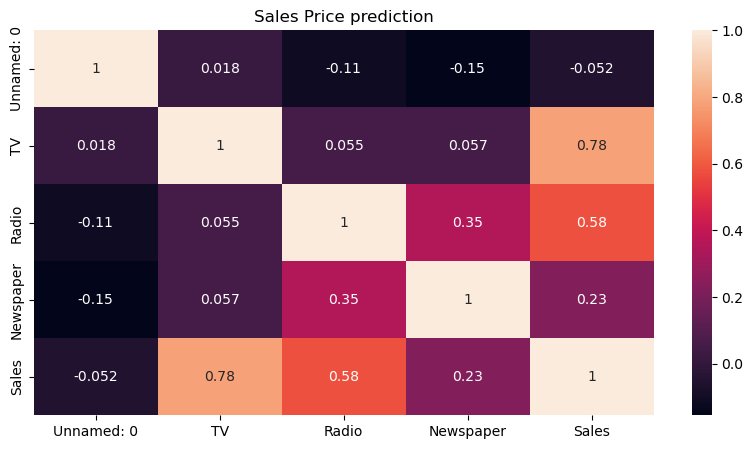

In [10]:
#Data Visualization
plt.figure(figsize = (10,5))
sns.heatmap(corr_mat,annot=True)
plt.title('Sales Price prediction')

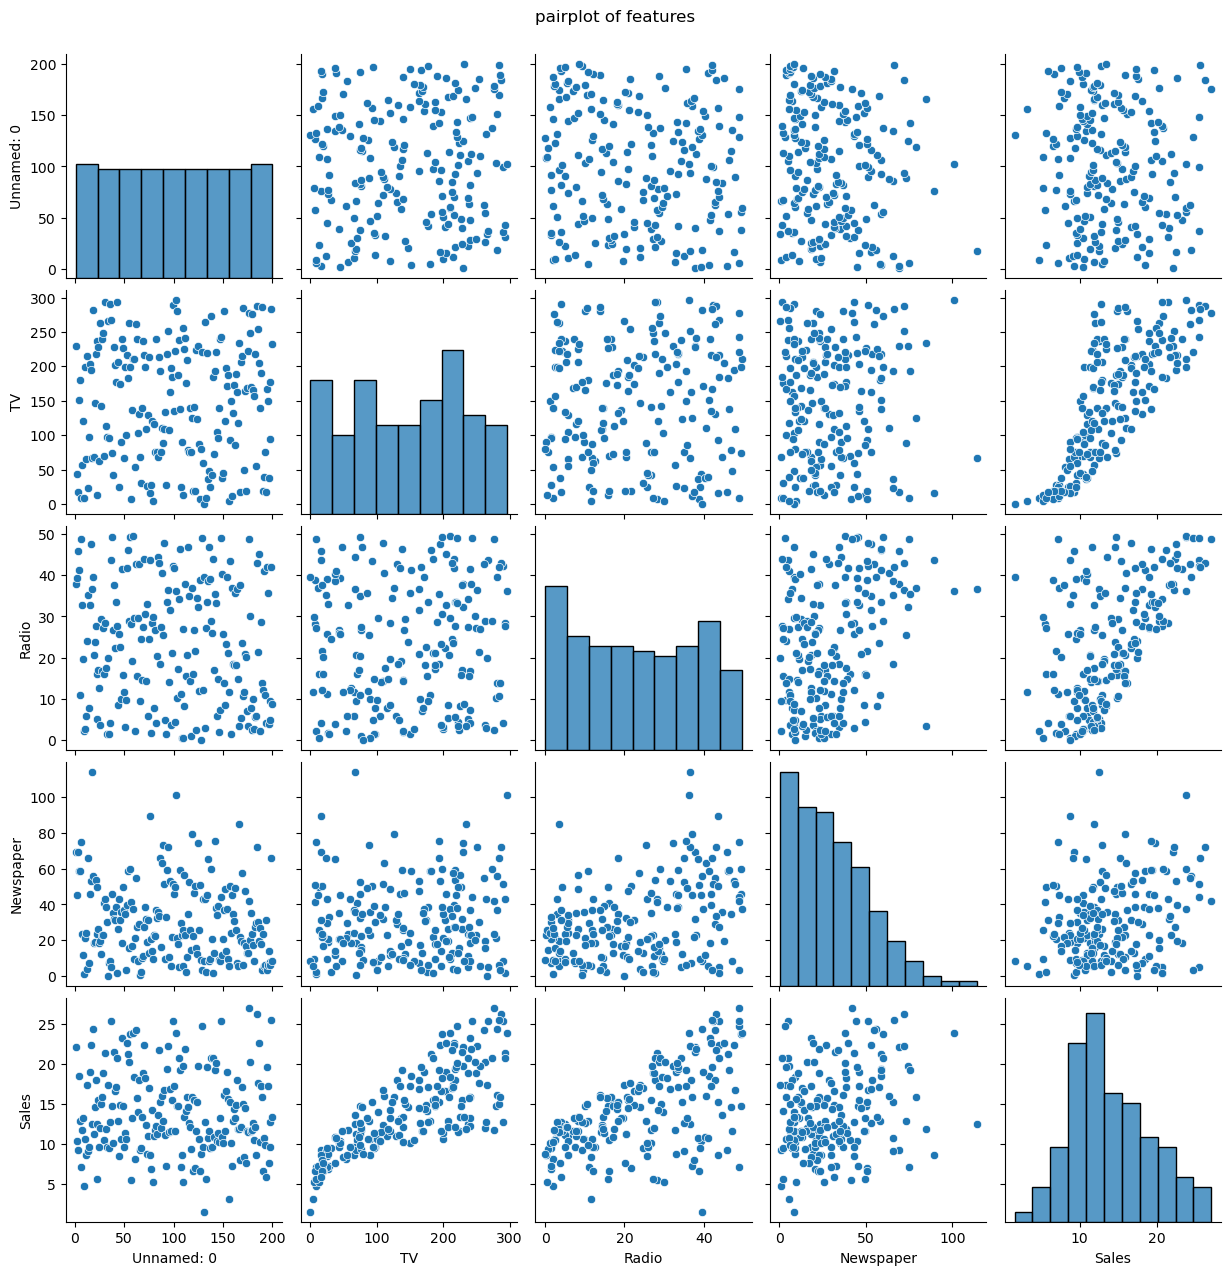

In [13]:
sns.pairplot(data)
plt.suptitle('pairplot of features',y=1.02)
plt.show()

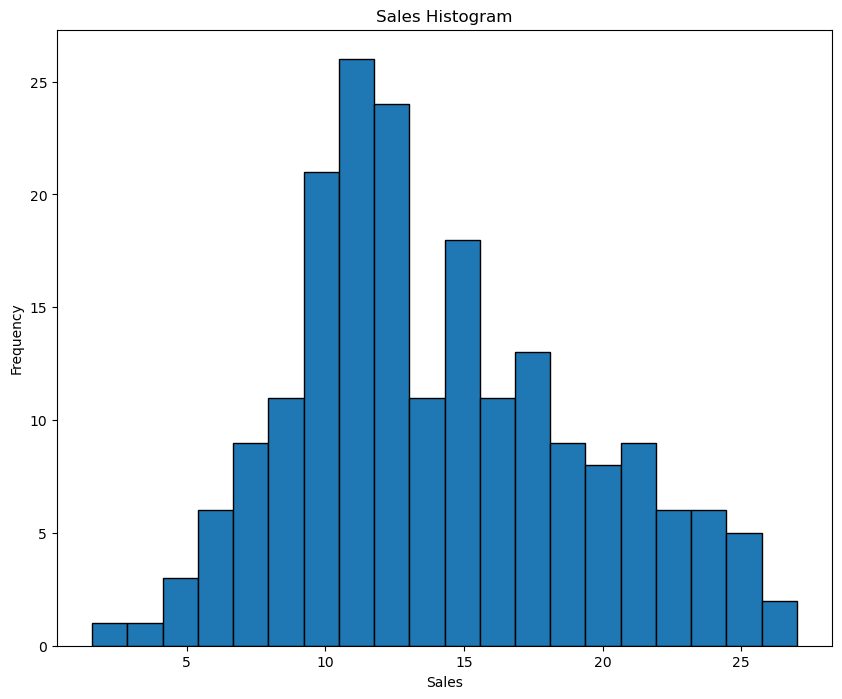

In [17]:
#Sales Histogram
plt.figure(figsize = (10,8))
plt.hist(data['Sales'],bins=20,edgecolor='black')
plt.title('Sales Histogram')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [25]:
#Preparing data for sales
x = np.array(data.drop(['Sales'], axis = 1))
y = np.array(data['Sales'])
#Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [31]:
#Create an object for Linear regression model
print("Linear Regression model")
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print(y_pred)

Linear Regression model
[ 9.34827802 19.49647214 12.37008579  8.23184013  8.63909788 19.26668295
 10.02307284 15.50222417 21.53167706 12.8517461   8.25008197 11.96274495
 16.80494413 14.37616912 18.48601041 17.649088   21.26555461 19.72471128
  4.65627691 21.82434735 13.49929884 18.39399443 17.11931017 21.71121854
 12.16590892 17.99752162 19.88959248  8.9492868  22.9930414  14.50808581
 10.43011965 14.82341313  9.36090372 17.80025907  7.82936223  6.77029584
 15.77775849  9.60086096 10.21929327 16.10526206]


In [33]:
print("Mean squared error: ",mean_squared_error(y_test,y_pred))
print("R^2 Error: ",r2_score(y_test,y_pred))

Mean squared error:  2.6762529273005478
R^2 Error:  0.9060856583903363


In [35]:
df = pd.DataFrame({'Real Values' : y_test,'Predicted values' : y_pred})
print(df.head(10))

   Real Values  Predicted values
0         10.7          9.348278
1         19.7         19.496472
2          9.3         12.370086
3          9.7          8.231840
4          5.3          8.639098
5         20.7         19.266683
6         11.2         10.023073
7         14.7         15.502224
8         23.2         21.531677
9         12.6         12.851746


In [44]:
#Using Decision Tree
print("Decision Tree Model")
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print(y_pred)

Decision Tree Model
[ 9.7 20.7  8.7  9.7  1.6 22.4 11.  13.6 22.3 12.5  9.7 12.9 19.2 15.
 19.4 18.  20.7 20.7  7.2 23.7 14.7 17.  15.5 23.7 12.9 21.8 22.4  7.
 23.7 12.5 12.4 13.3 11.3 15.9  9.7  6.9 12.7 10.1  9.5 15. ]


In [45]:
print("Mean squared error: ",mean_squared_error(y_test,y_pred))
print("R^2 Error: ",r2_score(y_test,y_pred))

Mean squared error:  1.5464999999999995
R^2 Error:  0.9457306415930417


In [47]:
df = pd.DataFrame({'Real Values' : y_test, 'Predicted Values' : y_pred})
print(df.head(10))

   Real Values  Predicted Values
0         10.7               9.7
1         19.7              20.7
2          9.3               8.7
3          9.7               9.7
4          5.3               1.6
5         20.7              22.4
6         11.2              11.0
7         14.7              13.6
8         23.2              22.3
9         12.6              12.5


In [50]:
#Using randomForestRegressor Model
print("RandomForest Regressor")
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print(y_pred)

RandomForest Regressor
[10.381 20.033  7.902  9.797  3.74  20.942 11.193 13.512 22.347 12.583
  9.751 13.065 17.292 14.959 18.223 17.64  21.527 19.985  7.388 22.539
 14.015 15.994 15.656 22.829 12.555 19.987 21.326  7.814 23.352 12.079
 12.34  14.998 11.204 14.439  9.679  6.949 12.122 10.236  8.787 16.151]


In [51]:
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('R^2 Error: ',r2_score(y_test,y_pred))

Mean Squared Error:  0.7200304749999983
R^2 Error:  0.9747328859284142


In [53]:
df = pd.DataFrame({'Real Values' : y_test,'Predicted Values' : y_pred})
print(df.head(20))

    Real Values  Predicted Values
0          10.7            10.381
1          19.7            20.033
2           9.3             7.902
3           9.7             9.797
4           5.3             3.740
5          20.7            20.942
6          11.2            11.193
7          14.7            13.512
8          23.2            22.347
9          12.6            12.583
10          9.9             9.751
11         12.2            13.065
12         17.2            17.292
13         15.5            14.959
14         19.0            18.223
15         18.5            17.640
16         22.2            21.527
17         20.2            19.985
18          7.3             7.388
19         24.7            22.539
